Alumno: Hineill David Céspedes Espinoza
Código:20213704

Pregunta 1 - Parte Computacional

En el presente ejercicio se explorar´a la de recuperaci´on de se˜nales utilizando
bancos de filtros pasa bajo y pasa alto. El enfoque se centrar´a en c´omo la convoluci
´on de se˜nales, junto con sistemas de interpolaci´on y decimaci´on, permite
la reconstrucci´on de se˜nales a partir de sus componentes filtrados. Para ilustrar
este proceso, se desarrollar´a un programa que realice lo siguiente:


a) (1 pto.) Generar una se˜nal X, monocomponente, cuya frecuencia var´ıa linealmente
desde 0,1 a 0,4 en frecuencia normalizada (donde 0.5 representa
la frecuencia de Nyquist). Su amplitud tambi´en var´ıa linealmente desde 0
a 1. Mostrar la se˜nal y su espectro en frecuencia normalizada. Comentar.

In [89]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt


In [158]:
fs = 4e3 #Frecuencia de muestreo variable
f_ini = 0.1*fs #Frecuencia inicial
f_end = 0.4*fs #Frecuencia final
A_ini = 0 #Amplitud inicial 
A_end = 1 #Amplitud final
t = np.arange(A_ini,A_end,1/fs)
f = np.linspace(f_ini, f_end, len(t))
Ns = len(t)
print(Ns)
signal = (t)*np.sin((2*np.pi*(f))*t) #El arreglo de frecuencia ya varía linealmente

4000


Text(0.5, 1.0, 'Señal chirp en el dominio del tiempo')

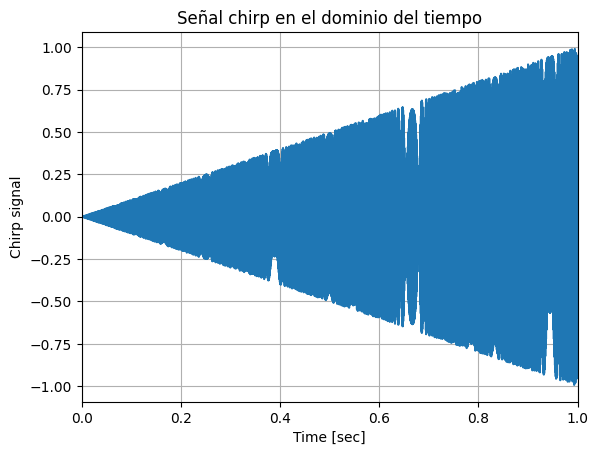

In [159]:
plt.figure(1)
plt.plot(t,signal)
plt.xlim([0,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal') #Chirp es una señal usada en la que se varía la frecuencia a medida de que el tiempo avanza
plt.title('Señal chirp en el dominio del tiempo')

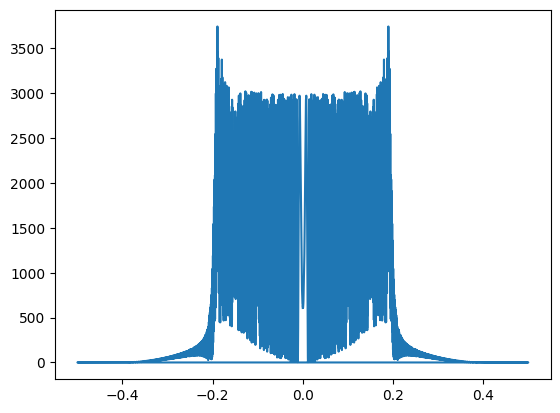

In [157]:
fft_signal = np.fft.fftshift(np.fft.fft(signal)) #Calculamos la tranformada de fourier
spc = np.abs(fft_signal)**2 #Obtenemos el cuadrado de la magnitud del espectro 
freq = np.fft.fftfreq(t.shape[-1])
plt.figure(3)
plt.plot(freq, spc)


b) (1 pto.) Generar filtros h y g (ver programa lab1.py), los cuales son filtros
pasa bajo y pasa alto respectivamente. Graficar en frecuencia normalizada
(donde 0.5 representa la frecuencia de Nyquist) y comentar.

In [176]:
#Extraído de lab1.py 
h = np.array([-1.1748e-04,   6.7545e-04,  -3.9174e-04,  -4.8704e-03,   8.7461e-03,   1.3981e-02,  -4.4088e-02,
-1.7369e-02,   1.2875e-01,   4.7248e-04,  -2.8402e-01,  -1.5829e-02,   5.8535e-01,   6.7563e-01, 3.1287e-01,   5.4416e-02 ])

g = np.array([ -5.4416e-02,   3.1287e-01,  -6.7563e-01,   5.8535e-01,   1.5829e-02,  -2.8402e-01,  -4.7248e-04,
1.2875e-01,  1.7369e-02,  -4.4088e-02,   -1.3981e-02,   8.7461e-03,   4.8704e-03,  -3.9174e-04, -6.7545e-04,  -1.1748e-04 ])

h_rec = np.array([ 5.4416e-02,   3.1287e-01,   6.7563e-01,   5.8535e-01,  -1.5829e-02,  -2.8402e-01,   4.7248e-04,
1.2875e-01,  -1.7369e-02,  -4.4088e-02,   1.3981e-02,   8.7461e-03,  -4.8704e-03,  -3.9174e-04, 6.7545e-04,  -1.1748e-04 ])

g_rec = np.array([ -1.1748e-04,  -6.7545e-04,  -3.9174e-04,   4.8704e-03,   8.7461e-03,  -1.3981e-02,  -4.4088e-02,
1.7369e-02,   1.2875e-01,  -4.7248e-04,   -2.8402e-01,   1.5829e-02,   5.8535e-01,  -6.7563e-01, 3.1287e-01,  -5.4416e-02 ])



c) (1 pto.) Convolucione la se˜nal de entrada con los filtros h y g: XL = X∗h,
XH = X∗g, mantener el n´umero de muestras de la se˜nal original. Grafique
el espectro de ambas se˜nales y comentar.

d) (1 pto.) Submuestree (downsampling) con factor 2 las se˜nales XL y XH.
(XLDN = downsampling(XL) y XHDN = downsampling(XH)). Grafique el
espectro de cada una de ellas y comentar.

e) (1 pto.) Realice un upsampling (factor 2) de las se˜nales que previamente
han pasado por el submuestreo. (YLUP = upsampling(XLDN) y YHUP =
upsampling(XHDN)). Grafique el espectro de cada una de ellas y comentar.

f) (1 pto.) Generar filtros hrec y grec (ver programa lab1.py). Convolucione
las se˜nales que previamente han pasado por la operaci´on de upsampling
con los filtros hrec y grec. YL = YLUP ∗ hrec, YH = YHUP ∗ grec, mantener el
n´umero de muestras de la se˜nal original. Grafique el espectro de cada una
de ellas y comentar.

g) (1 pto.) Compare la se˜nal Y = YL +YH y comp´arela con la se˜nal original.
Graficar en el tiempo y frecuencia, comentar sus resultados.

PREGUNTA 2:
Se busca realizar la decimación con factor 2 (reducir a la mitad la frecuencia
de muestreo) de una señal de audio. La señal se encuentra corrompida por tono
sinusuidal en una frecuencia mayor a la que señal de audio original se encuentra,
para ello se realizará lo siguiente:




a) (1 pto.) Leer el archivo audio.wav, identificar la frecuencia de muestreo y
en base a ello generar un vector de tiempos. Graficar la señal en el tiempo
y su espectro en frecuencia en Hz.

In [161]:
from scipy.io import wavfile

La frecuencia de muestreo usada en el audio es de :  3000 Hz


<StemContainer object of 3 artists>

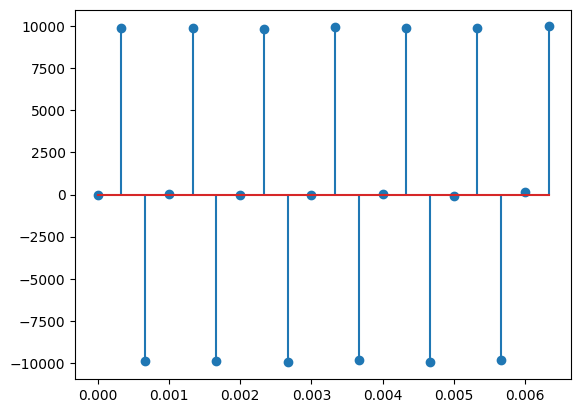

In [172]:
fs, y_t = wavfile.read('audio.wav') #Extraemos la frecuencia de muestreo (metadata) y los valores del arreglo
print(f"La frecuencia de muestreo usada en el audio es de :  { fs} Hz")
time_array = np.arange(len(y_t))/fs #Arreglo de tiempos
plt.figure(1)
plt.plot( time_array, y_t)
plt.title("Señal audio.wav en el dominio del tiempo ")
#plt.stem( time_array[:20], y_t[:20])

<StemContainer object of 3 artists>

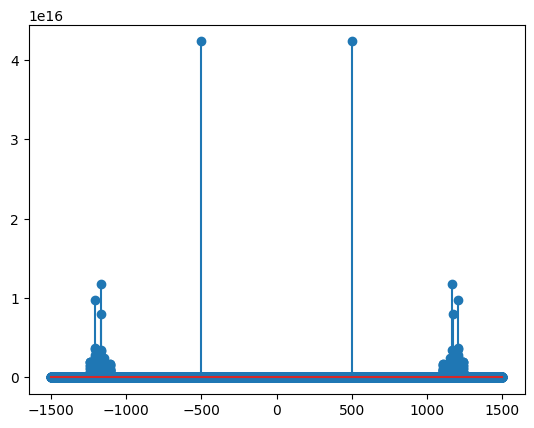

In [175]:
fft_wav = np.fft.fftshift(np.fft.fft(y_t)) #Calculamos la tranformada de fourier
spc = np.abs(fft_wav)**2 #Obtenemos el cuadrado de la magnitud del espectro 
freq = np.fft.fftfreq(time_array.shape[-1]) #Frecuencia normalizada
plt.figure(5)
plt.stem(freq*fs, spc)

b) (1 pto.) Hallar las frecuencias en las cuales se encuentra el audio original
y la frecuencia espec´ıfica del tono sinusoidal.

c) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando solo downsampling. Graficar el espectro en frecuencia
en Hz y guardar la se˜nal generada.


) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando solo downsampling. Graficar el espectro en frecuencia
en Hz y guardar la se˜nal generada.


d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando decimaci´on, es decir aplicar un filtro pasa bajos ideal
y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz
y guardar la se˜nal generada.


e) (1 pto.) ¿C´omo se compararan ambos caso? ¿Cu´al m´etodo recupera adecuadamente
la se˜nal original y cual produce aliasing? Explicar el por qu´e
en ambos casos.
2

d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando decimaci´on, es decir aplicar un filtro pasa bajos ideal
y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz
y guardar la se˜nal generada.
e) (1 pto.) ¿C´omo se compararan ambos caso? ¿Cu´al m´etodo recupera adecuadamente
la se˜nal original y cual produce aliasing? Explicar el por qu´e
en ambos casos.
2